# Statistical Analysis of USA Air Quality Index: Confidence Intervals & Hypothesis Testing

In [1]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

## 1. Confidence intervals

### Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above.

In this case, we've just started our new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). RRE operates in the following U.S. states: **`California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** We've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

We will be working with a dataset that gives AQI measurements by state over time.

In [2]:
# Read in the dataset
aqi = pd.read_csv('c4_epa_air_quality.csv')

#### Exploring the dataset

In [3]:
aqi.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [4]:
aqi.describe(include='all')

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260.000000,260,260,260,260,257,260,260,260.000000,260.000000
unique,NaN,1,52,149,190,253,1,1,NaN,NaN
top,NaN,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,NaN,260,66,14,21,2,260,260,NaN,NaN
mean,129.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,75.199734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,64.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,129.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,194.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


In [5]:
aqi['state_name'].value_counts()

state_name
California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia                  2
Washington               2
Idaho                    2
Nebraska         

1. What time range does this data cover?

> *All of the sites collected data on January 1st, 2018.*

2. What are the minimum and maximum AQI values observed in the dataset?

> *The minimum AQI value is 0 and the maximum AQI value is 50.*

3. Are all states equally represented in the dataset?

> *No, all states are not equally represented. California has 66 sites that reported AQI for this dataset, while states such as Delaware and Alabama have only one site that reported AQI.*

#### Summarize the mean AQI for RRE states

In [6]:
# Create a list of RRE states.
rre_states = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']

# Subset `aqi` to only consider these states.
aqi_rre = aqi[aqi['state_name'].isin(rre_states)]

# Find the mean aqi for each of the RRE states.
aqi_rre.groupby(['state_name']).agg({'aqi':'mean','state_name':'count'})

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


<Axes: xlabel='state_name', ylabel='aqi'>

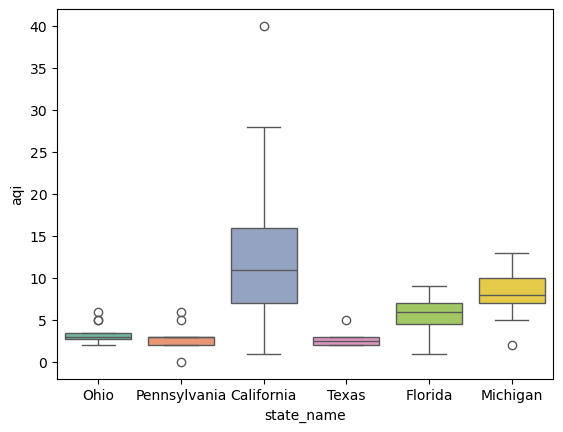

In [7]:
# Boxplot
sns.boxplot(x=aqi_rre['state_name'], y=aqi_rre['aqi'], data=aqi_rre, hue='state_name', palette='Set2')

Based on the data and visualization, which state(s) do we suspect will be most affected by this policy?

> - California: The mean and a signficant portion of the boxplot range over 10.
> - Michigan: While the mean is below 10, the boxplot ranges above 10.

#### Construct confidence intervals for California and Michigan

**Confidence level:**

95% is the confidence level.

In [8]:
# Extract California AQI values
aqi_ca = aqi[aqi['state_name'] == 'California']['aqi']

# Calculate sample statistics
n = len(aqi_ca)
mean = np.mean(aqi_ca) 
std = np.std(aqi_ca, ddof=1)

# Compute standard error
se = std / np.sqrt(n)

# Calculate t critical value for 95% CI
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)

# Compute confidence interval
ci_lower = mean - t_crit*se
ci_upper = mean + t_crit*se
(ci_lower, ci_upper)

(10.326342414715956, 13.916081827708286)

In [9]:
# Extract Michigan AQI values
aqi_mi = aqi[aqi['state_name'] == 'Michigan']['aqi']

# Calculate sample statistics
n = len(aqi_mi)
mean = np.mean(aqi_mi) 
std = np.std(aqi_mi, ddof=1)

# Compute standard error
se = std / np.sqrt(n)

# Calculate t critical value for 95% CI
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)

# Compute confidence interval
ci_lower = mean - t_crit*se
ci_upper = mean + t_crit*se
(ci_lower, ci_upper)

(5.60719797774288, 10.615024244479342)

#### Key takeaways

* Based on the mean AQI for RRE states, California and Michigan were most likely to have experienced a mean AQI above 10.
* With California experiencing the highest sample mean AQI in the data, it appears to be the state most likely to be affected by the policy change.
* Constructing confidence intervals allows us to estimate the population mean AQI with a specified level of confidence.  
> * For California, the 95% confidence interval from the sample data yielded `[10.3, 13.9]`, indicating that there is a 95% confidence the population mean AQI for California falls within this range. Since the entire interval is above 10, this suggests that California exceeds the policy threshold.
> * For Michigan, the 95% confidence interval was `[5.6, 10.6]`. Because this interval overlaps 10, we cannot conclude with confidence that Michigan’s population mean AQI is above the policy threshold, implying uncertainty about whether Michigan would be affected. 

## 2. Hypothesis testing

### Introduction

In this case, we work for an environmental think tank called Repair Our Air (ROA). ROA is formulating policy recommendations to improve the air quality in America, using the Environmental Protection Agency's Air Quality Index (AQI) to guide their decision making. An AQI value close to 0 signals "little to no" public health concern, while higher values are associated with increased risk to public health.

They've tasked us with leveraging AQI data to help them prioritize their strategy for improving air quality in America.

ROA is considering the following decisions:
> 1. ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is higher than that of the rest of California.
> 2. With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?
> 3. A new policy will affect those states with a mean AQI of 10 or greater. Would Michigan be affected by this new policy?

We will be working with the same dataset that gives AQI measurements by state over time.

In [10]:
# Read in the dataset
aqi = pd.read_csv('c4_epa_air_quality.csv')

#### Exploring the dataset

In [11]:
aqi.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [12]:
print(aqi.describe(include='all'))

        Unnamed: 0  date_local  state_name  county_name      city_name  \
count   260.000000         260         260          260            260   
unique         NaN           1          52          149            190   
top            NaN  2018-01-01  California  Los Angeles  Not in a city   
freq           NaN         260          66           14             21   
mean    129.500000         NaN         NaN          NaN            NaN   
std      75.199734         NaN         NaN          NaN            NaN   
min       0.000000         NaN         NaN          NaN            NaN   
25%      64.750000         NaN         NaN          NaN            NaN   
50%     129.500000         NaN         NaN          NaN            NaN   
75%     194.250000         NaN         NaN          NaN            NaN   
max     259.000000         NaN         NaN          NaN            NaN   

       local_site_name   parameter_name   units_of_measure  arithmetic_mean  \
count              257          

In [13]:
print(aqi['state_name'].value_counts())

state_name
California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia                  2
Washington               2
Idaho                    2
Nebraska         

From the data exploration, what do we recognize?

> - *We have county-level data for testing the first hypothesis.*
> - *Ohio, New York, and Michigan all have a relatively higher number of observations than most other states, which is useful for testing the second and third hypotheses.*

#### Hypothesis testing

**Hypothesis 1:** "ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is higher than that of the rest of California."

* $H_0$: The mean AQI in Los Angeles County is less than or equal to the mean AQI in the rest of California.
* $H_A$: The mean AQI in Los Angeles County is greater than the mean AQI in the rest of California.

In [14]:
# Create dataframes for each sample being compared in the test
ca_la = aqi[aqi['county_name'] == 'Los Angeles']
ca_other = aqi[(aqi['state_name'] == 'California') & (aqi['county_name'] != 'Los Angeles')]

In [15]:
# Perform the t-test
stats.ttest_ind(a=ca_la['aqi'], b=ca_other['aqi'], equal_var=False, alternative='greater')

TtestResult(statistic=2.1107010796372014, pvalue=0.024919528421205497, df=17.08246830361151)

Based on the p-value we got above, do we reject or fail to reject the null hypothesis?

> *Since the p-value (0.02) is smaller than the chosen significance level (0.05), we reject the null hypothesis. This provides statistically significant evidence that the mean AQI in Los Angeles County is higher than in the rest of California, suggesting that a metropolitan-focused strategy may be appropriate.*

**Hypothesis 2:** "With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?"

* $H_0$: The mean AQI of New York is greater than or equal to that of Ohio.
* $H_A$: The mean AQI of New York is below that of Ohio.

In [16]:
# Create dataframes for each sample being compared in the test
ny = aqi[aqi['state_name'] == 'New York']
ohio = aqi[aqi['state_name'] == 'Ohio']

In [17]:
# Perform the t-test
stats.ttest_ind(a=ny['aqi'], b=ohio['aqi'], equal_var=False, alternative='less')

TtestResult(statistic=-2.025951038880333, pvalue=0.03044650269193468, df=15.036745051598716)

Based on the p-value we got above, do we reject or fail to reject the null hypothesis?

> *Since the p-value (0.03) is smaller than the chosen significance level (0.05), we reject the null hypothesis. This provides statistically significant evidence that the mean AQI in New York is lower than in Ohio, suggesting that New York would be the more favorable location for ROA’s next regional office if being in a healthier environment is a key factor in the decision.*

**Hypothesis 3:** "A new policy will affect those states with a mean AQI of 10 or greater. Will Michigan be affected by this new policy?"

* $H_0$: The mean AQI of Michigan is less than or equal to 10.
* $H_A$: The mean AQI of Michigan is greater than 10.

In [18]:
# Create dataframes for each sample being compared in the test
michigan = aqi[aqi['state_name'] == 'Michigan']

In [19]:
# Perform the t-test
stats.ttest_1samp(michigan['aqi'], 10, alternative='greater')

TtestResult(statistic=-1.7395913343286131, pvalue=0.9399405193140109, df=8)

Based on the p-value we got above, do we reject or fail to reject the null hypothesis?

> *Since the p-value (0.94) is larger than the chosen significance level (0.05), we fail to reject the null hypothesis. This means there is no statistically significant evidence that the mean AQI in Michigan is greater than 10, implying that Michigan would most likely not be affected by the new policty.*

#### Key takeaways

* Even with small sample sizes, the variation within the data is enough to allow us to make statistically significant conclusions.
* At the 5% significance level:
> * The mean AQI in Los Angeles County was found to be statistically higher than the mean AQI in the rest of California.  
> * New York was shown to have a statistically lower mean AQI than Ohio.  
> * We were unable to conclude that Michigan’s mean AQI was greater than 10. 

# END